#### 1.1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

housing = pd.read_csv('housing.csv')

train = housing.sample(frac = .7)
test = housing.drop(train.index)

#### 1.2

In [2]:
def regularize(d):
    xtrain = train.drop('medv', axis = 1)
    return (d - xtrain.mean())/xtrain.std()

def get_xy(data):
    y = data.medv
    x = regularize(data.drop('medv',axis =1))
    return x, y

xtrain, ytrain = get_xy(train)
xtest, ytest = get_xy(test)

#### 1.3
Check validation error for the training set with multiple epoch to get the best learning rate

In [3]:
class LinearModel(tf.keras.Model):
    
    def __init__(self):
        super(LinearModel, self).__init__()
        self.dense1 = layers.Dense(1, activation = tf.nn.relu)
        
    def call(self, inputs, training = False):
        if isinstance(inputs, pd.DataFrame):
            inputs = inputs.values
        return self.dense1(inputs)
    
def compile_linear_model(lr = .001):
    model = LinearModel()
    model.compile(tf.keras.optimizers.RMSprop(lr), loss=tf.losses.mean_squared_error)
    return model

loss_hists = []
learning_rates = [.0001*10**k for k in range(5)]
epochs = 200
val_size = .2
fit_model = lambda m, vs: m.fit(xtrain.values, 
                                ytrain.values, 
                                epochs = epochs, 
                                validation_split = vs, 
                                verbose = 1)
for  lr in learning_rates:
    model = compile_linear_model(lr)
    hist = fit_model(model, val_size)
    loss_hists.append(hist.history)

W0923 21:55:19.316249  8552 deprecation.py:506] From F:\Anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0923 21:55:19.471258  8552 deprecation.py:323] From F:\Anaconda\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 283 samples, validate on 71 samples
Epoch 1/200
283/283 [==============================] - 0s 329us/sample - loss: 575.6632 - val_loss: 618.4960
Epoch 2/200
283/283 [==============================] - 0s 32us/sample - loss: 575.5358 - val_loss: 618.3591
Epoch 3/200
283/283 [==============================] - 0s 32us/sample - loss: 575.4336 - val_loss: 618.2195
Epoch 4/200
283/283 [==============================] - 0s 32us/sample - loss: 575.3314 - val_loss: 618.0865
Epoch 5/200
283/283 [==============================] - 0s 28us/sample - loss: 575.2271 - val_loss: 617.9478
Epoch 6/200
283/283 [==============================] - 0s 35us/sample - loss: 575.1241 - val_loss: 617.8198
Epoch 7/200
283/283 [==============================] - 0s 32us/sample - loss: 575.0182 - val_loss: 617.6809
Epoch 8/200
283/283 [==============================] - 0s 35us/sample - loss: 574.9075 - val_loss: 617.5458
Epoch 9/200
283/283 [==============================] - 0s 32us/sample - loss: 574.7981 - v

Epoch 76/200
283/283 [==============================] - 0s 32us/sample - loss: 565.6182 - val_loss: 606.7338
Epoch 77/200
283/283 [==============================] - 0s 28us/sample - loss: 565.4652 - val_loss: 606.5687
Epoch 78/200
283/283 [==============================] - 0s 32us/sample - loss: 565.3139 - val_loss: 606.3992
Epoch 79/200
283/283 [==============================] - 0s 32us/sample - loss: 565.1574 - val_loss: 606.2295
Epoch 80/200
283/283 [==============================] - 0s 28us/sample - loss: 565.0055 - val_loss: 606.0661
Epoch 81/200
283/283 [==============================] - 0s 35us/sample - loss: 564.8545 - val_loss: 605.8924
Epoch 82/200
283/283 [==============================] - 0s 28us/sample - loss: 564.7020 - val_loss: 605.7202
Epoch 83/200
283/283 [==============================] - 0s 28us/sample - loss: 564.5556 - val_loss: 605.5488
Epoch 84/200
283/283 [==============================] - 0s 32us/sample - loss: 564.4055 - val_loss: 605.3691
Epoch 85/200
283/28

Epoch 150/200
283/283 [==============================] - 0s 32us/sample - loss: 552.9943 - val_loss: 593.3454
Epoch 151/200
283/283 [==============================] - 0s 28us/sample - loss: 552.8132 - val_loss: 593.1595
Epoch 152/200
283/283 [==============================] - 0s 39us/sample - loss: 552.6333 - val_loss: 592.9752
Epoch 153/200
283/283 [==============================] - 0s 32us/sample - loss: 552.4558 - val_loss: 592.7940
Epoch 154/200
283/283 [==============================] - 0s 28us/sample - loss: 552.2740 - val_loss: 592.6013
Epoch 155/200
283/283 [==============================] - 0s 32us/sample - loss: 552.0919 - val_loss: 592.4192
Epoch 156/200
283/283 [==============================] - 0s 28us/sample - loss: 551.9101 - val_loss: 592.2307
Epoch 157/200
283/283 [==============================] - 0s 28us/sample - loss: 551.7271 - val_loss: 592.0486
Epoch 158/200
283/283 [==============================] - 0s 28us/sample - loss: 551.5482 - val_loss: 591.8674
Epoch 159/

283/283 [==============================] - 0s 32us/sample - loss: 518.8348 - val_loss: 570.5027
Epoch 25/200
283/283 [==============================] - 0s 28us/sample - loss: 517.1479 - val_loss: 568.6772
Epoch 26/200
283/283 [==============================] - 0s 28us/sample - loss: 515.4555 - val_loss: 566.7857
Epoch 27/200
283/283 [==============================] - 0s 35us/sample - loss: 513.7576 - val_loss: 564.9832
Epoch 28/200
283/283 [==============================] - 0s 25us/sample - loss: 512.0645 - val_loss: 563.0948
Epoch 29/200
283/283 [==============================] - 0s 35us/sample - loss: 510.3706 - val_loss: 561.2333
Epoch 30/200
283/283 [==============================] - 0s 32us/sample - loss: 508.6650 - val_loss: 559.3366
Epoch 31/200
283/283 [==============================] - 0s 32us/sample - loss: 506.9988 - val_loss: 557.5271
Epoch 32/200
283/283 [==============================] - 0s 32us/sample - loss: 505.3448 - val_loss: 555.6895
Epoch 33/200
283/283 [==========

283/283 [==============================] - 0s 28us/sample - loss: 403.8449 - val_loss: 443.7225
Epoch 100/200
283/283 [==============================] - 0s 28us/sample - loss: 402.5187 - val_loss: 442.2691
Epoch 101/200
283/283 [==============================] - 0s 32us/sample - loss: 401.1996 - val_loss: 440.7544
Epoch 102/200
283/283 [==============================] - 0s 28us/sample - loss: 399.8612 - val_loss: 439.2984
Epoch 103/200
283/283 [==============================] - 0s 35us/sample - loss: 398.5574 - val_loss: 437.8301
Epoch 104/200
283/283 [==============================] - 0s 32us/sample - loss: 397.2275 - val_loss: 436.3324
Epoch 105/200
283/283 [==============================] - 0s 28us/sample - loss: 395.9173 - val_loss: 434.8994
Epoch 106/200
283/283 [==============================] - 0s 28us/sample - loss: 394.6264 - val_loss: 433.4282
Epoch 107/200
283/283 [==============================] - 0s 28us/sample - loss: 393.3230 - val_loss: 431.9832
Epoch 108/200
283/283 [=

283/283 [==============================] - 0s 28us/sample - loss: 320.2789 - val_loss: 349.2290
Epoch 174/200
283/283 [==============================] - 0s 28us/sample - loss: 319.3219 - val_loss: 348.1234
Epoch 175/200
283/283 [==============================] - 0s 32us/sample - loss: 318.4178 - val_loss: 347.1129
Epoch 176/200
283/283 [==============================] - 0s 32us/sample - loss: 317.4966 - val_loss: 346.0142
Epoch 177/200
283/283 [==============================] - 0s 28us/sample - loss: 316.5670 - val_loss: 344.9443
Epoch 178/200
283/283 [==============================] - 0s 32us/sample - loss: 315.6418 - val_loss: 343.8820
Epoch 179/200
283/283 [==============================] - 0s 28us/sample - loss: 314.7377 - val_loss: 342.8309
Epoch 180/200
283/283 [==============================] - 0s 32us/sample - loss: 313.8395 - val_loss: 341.7871
Epoch 181/200
283/283 [==============================] - 0s 28us/sample - loss: 312.9466 - val_loss: 340.7549
Epoch 182/200
283/283 [=

283/283 [==============================] - 0s 32us/sample - loss: 362.2155 - val_loss: 360.5525
Epoch 48/200
283/283 [==============================] - 0s 32us/sample - loss: 358.9056 - val_loss: 356.6316
Epoch 49/200
283/283 [==============================] - 0s 32us/sample - loss: 355.9719 - val_loss: 352.9437
Epoch 50/200
283/283 [==============================] - 0s 28us/sample - loss: 352.7113 - val_loss: 349.1651
Epoch 51/200
283/283 [==============================] - 0s 28us/sample - loss: 349.5481 - val_loss: 345.4992
Epoch 52/200
283/283 [==============================] - 0s 32us/sample - loss: 346.2960 - val_loss: 341.7734
Epoch 53/200
283/283 [==============================] - 0s 28us/sample - loss: 342.7393 - val_loss: 337.4081
Epoch 54/200
283/283 [==============================] - 0s 32us/sample - loss: 339.2498 - val_loss: 333.5590
Epoch 55/200
283/283 [==============================] - 0s 32us/sample - loss: 335.8310 - val_loss: 329.6256
Epoch 56/200
283/283 [==========

283/283 [==============================] - 0s 28us/sample - loss: 106.6586 - val_loss: 107.9559
Epoch 123/200
283/283 [==============================] - 0s 32us/sample - loss: 105.0939 - val_loss: 107.3181
Epoch 124/200
283/283 [==============================] - 0s 28us/sample - loss: 103.7257 - val_loss: 106.6593
Epoch 125/200
283/283 [==============================] - 0s 32us/sample - loss: 102.3393 - val_loss: 106.0460
Epoch 126/200
283/283 [==============================] - 0s 32us/sample - loss: 100.7553 - val_loss: 105.3084
Epoch 127/200
283/283 [==============================] - 0s 28us/sample - loss: 99.2453 - val_loss: 104.5067
Epoch 128/200
283/283 [==============================] - 0s 28us/sample - loss: 97.8511 - val_loss: 103.5720
Epoch 129/200
283/283 [==============================] - 0s 25us/sample - loss: 96.4721 - val_loss: 102.7602
Epoch 130/200
283/283 [==============================] - 0s 28us/sample - loss: 95.1686 - val_loss: 101.9282
Epoch 131/200
283/283 [=====

Epoch 198/200
283/283 [==============================] - 0s 32us/sample - loss: 47.5262 - val_loss: 62.0467
Epoch 199/200
283/283 [==============================] - 0s 32us/sample - loss: 47.3657 - val_loss: 61.7716
Epoch 200/200
283/283 [==============================] - 0s 28us/sample - loss: 47.2038 - val_loss: 61.5319
Train on 283 samples, validate on 71 samples
Epoch 1/200
283/283 [==============================] - 0s 452us/sample - loss: 459.7398 - val_loss: 353.9723
Epoch 2/200
283/283 [==============================] - 0s 32us/sample - loss: 301.4010 - val_loss: 258.4611
Epoch 3/200
283/283 [==============================] - 0s 35us/sample - loss: 238.8265 - val_loss: 206.0159
Epoch 4/200
283/283 [==============================] - 0s 28us/sample - loss: 203.7939 - val_loss: 173.0308
Epoch 5/200
283/283 [==============================] - 0s 35us/sample - loss: 181.4254 - val_loss: 149.0923
Epoch 6/200
283/283 [==============================] - 0s 32us/sample - loss: 165.6898 - v

Epoch 74/200
283/283 [==============================] - 0s 32us/sample - loss: 22.5277 - val_loss: 29.1678
Epoch 75/200
283/283 [==============================] - 0s 32us/sample - loss: 22.9813 - val_loss: 27.4919
Epoch 76/200
283/283 [==============================] - 0s 28us/sample - loss: 22.2584 - val_loss: 26.2195
Epoch 77/200
283/283 [==============================] - 0s 28us/sample - loss: 22.2843 - val_loss: 27.1612
Epoch 78/200
283/283 [==============================] - 0s 28us/sample - loss: 22.3986 - val_loss: 28.0363
Epoch 79/200
283/283 [==============================] - 0s 32us/sample - loss: 22.6968 - val_loss: 27.1304
Epoch 80/200
283/283 [==============================] - 0s 35us/sample - loss: 22.5289 - val_loss: 26.9372
Epoch 81/200
283/283 [==============================] - 0s 28us/sample - loss: 22.5304 - val_loss: 26.9231
Epoch 82/200
283/283 [==============================] - 0s 32us/sample - loss: 22.2798 - val_loss: 28.9155
Epoch 83/200
283/283 [===============

283/283 [==============================] - 0s 28us/sample - loss: 22.5966 - val_loss: 26.0005
Epoch 151/200
283/283 [==============================] - 0s 28us/sample - loss: 23.0220 - val_loss: 26.2770
Epoch 152/200
283/283 [==============================] - 0s 32us/sample - loss: 22.1956 - val_loss: 26.5812
Epoch 153/200
283/283 [==============================] - 0s 32us/sample - loss: 22.2598 - val_loss: 26.8197
Epoch 154/200
283/283 [==============================] - 0s 28us/sample - loss: 22.9380 - val_loss: 26.6756
Epoch 155/200
283/283 [==============================] - 0s 32us/sample - loss: 22.3230 - val_loss: 27.9316
Epoch 156/200
283/283 [==============================] - 0s 32us/sample - loss: 22.3706 - val_loss: 26.9775
Epoch 157/200
283/283 [==============================] - 0s 32us/sample - loss: 21.9781 - val_loss: 28.3918
Epoch 158/200
283/283 [==============================] - 0s 32us/sample - loss: 22.3342 - val_loss: 29.8336
Epoch 159/200
283/283 [===================

283/283 [==============================] - 0s 32us/sample - loss: 36.6849 - val_loss: 55.1518
Epoch 26/200
283/283 [==============================] - 0s 28us/sample - loss: 48.2479 - val_loss: 31.3281
Epoch 27/200
283/283 [==============================] - 0s 32us/sample - loss: 39.2015 - val_loss: 33.1380
Epoch 28/200
283/283 [==============================] - 0s 28us/sample - loss: 33.7136 - val_loss: 40.9412
Epoch 29/200
283/283 [==============================] - 0s 28us/sample - loss: 54.2581 - val_loss: 31.7014
Epoch 30/200
283/283 [==============================] - 0s 28us/sample - loss: 34.0585 - val_loss: 68.2370
Epoch 31/200
283/283 [==============================] - 0s 28us/sample - loss: 38.4841 - val_loss: 31.3925
Epoch 32/200
283/283 [==============================] - 0s 32us/sample - loss: 42.6723 - val_loss: 34.4432
Epoch 33/200
283/283 [==============================] - 0s 32us/sample - loss: 34.6236 - val_loss: 31.2930
Epoch 34/200
283/283 [============================

283/283 [==============================] - 0s 32us/sample - loss: 46.0579 - val_loss: 36.9807
Epoch 102/200
283/283 [==============================] - 0s 28us/sample - loss: 38.0050 - val_loss: 58.6980
Epoch 103/200
283/283 [==============================] - 0s 32us/sample - loss: 38.8768 - val_loss: 31.4376
Epoch 104/200
283/283 [==============================] - 0s 28us/sample - loss: 45.8806 - val_loss: 28.9363
Epoch 105/200
283/283 [==============================] - 0s 28us/sample - loss: 28.1094 - val_loss: 39.4133
Epoch 106/200
283/283 [==============================] - 0s 28us/sample - loss: 46.5041 - val_loss: 70.6897
Epoch 107/200
283/283 [==============================] - 0s 32us/sample - loss: 39.1812 - val_loss: 41.1805
Epoch 108/200
283/283 [==============================] - 0s 28us/sample - loss: 46.1201 - val_loss: 31.3647
Epoch 109/200
283/283 [==============================] - 0s 32us/sample - loss: 49.6791 - val_loss: 45.4911
Epoch 110/200
283/283 [===================

Epoch 177/200
283/283 [==============================] - 0s 32us/sample - loss: 49.2040 - val_loss: 29.1094
Epoch 178/200
283/283 [==============================] - 0s 32us/sample - loss: 25.8129 - val_loss: 58.9592
Epoch 179/200
283/283 [==============================] - 0s 32us/sample - loss: 42.0346 - val_loss: 43.5094
Epoch 180/200
283/283 [==============================] - 0s 32us/sample - loss: 47.5210 - val_loss: 48.8985
Epoch 181/200
283/283 [==============================] - 0s 32us/sample - loss: 33.0981 - val_loss: 28.0477
Epoch 182/200
283/283 [==============================] - 0s 28us/sample - loss: 51.3977 - val_loss: 34.9862
Epoch 183/200
283/283 [==============================] - 0s 32us/sample - loss: 35.1203 - val_loss: 30.9988
Epoch 184/200
283/283 [==============================] - 0s 28us/sample - loss: 46.3318 - val_loss: 38.3485
Epoch 185/200
283/283 [==============================] - 0s 28us/sample - loss: 28.2294 - val_loss: 39.0735
Epoch 186/200
283/283 [=====

#### 1.4

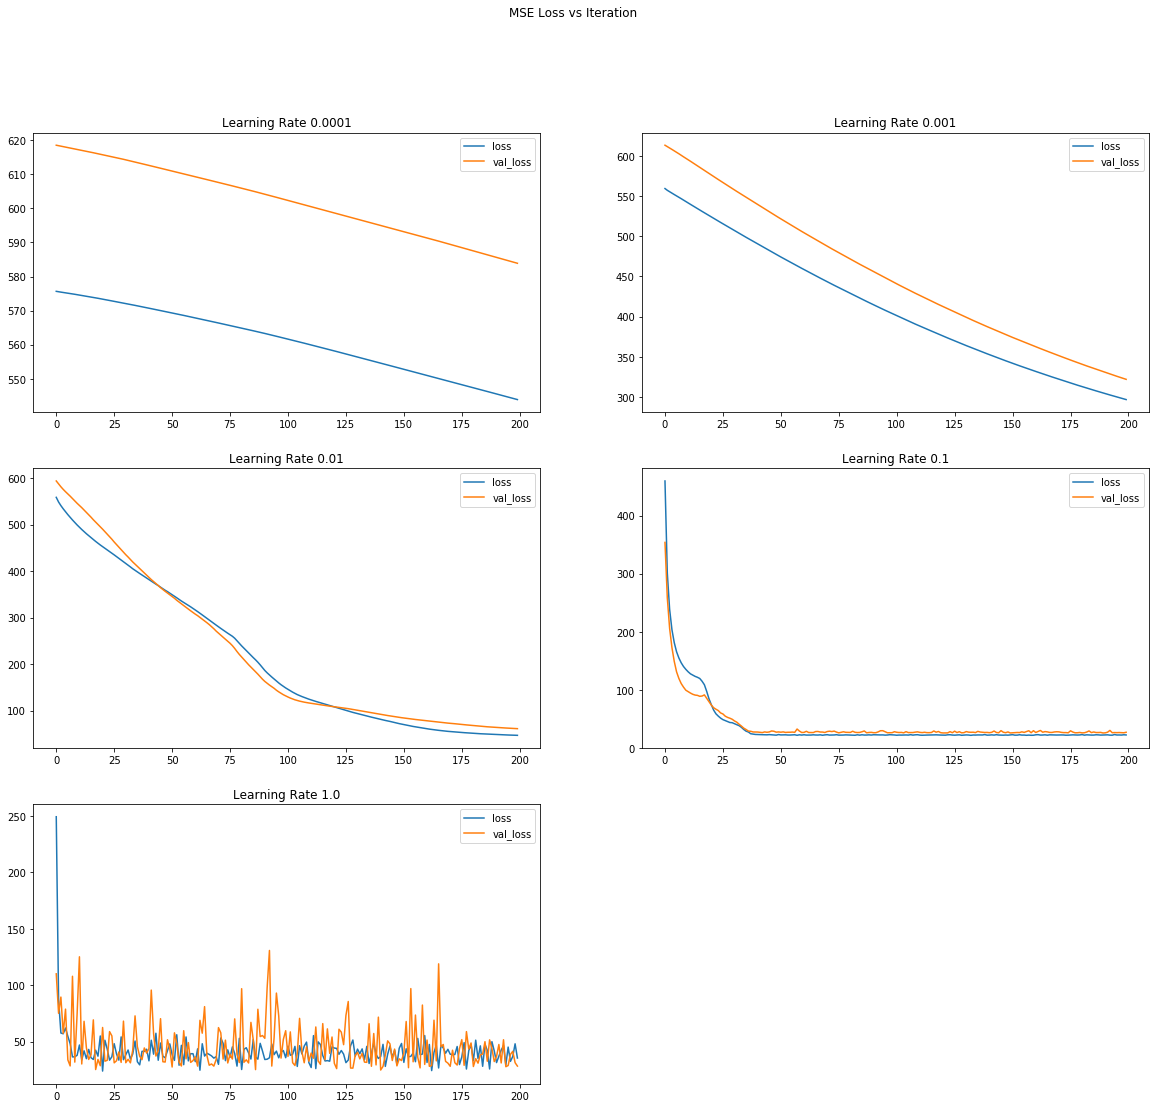

In [4]:
def lineplot_small_multiples(histories, title = None, sub_title_func = None, width = 2):
    #
    n_plots = len(histories)
    options = {'figsize': [20,35/width]}
    fig, ax = plt.subplots(int(np.ceil(n_plots/width)), width, **options)
    if title is not None:
        fig.suptitle(title)
    for i in range(int(np.ceil(n_plots/width))*width):
        x = int(i%width)
        y = int(np.floor(i/width))
        if i < n_plots:
            history = histories[i]
            for key, vals in history.items():
                ax[y,x].plot(range(len(vals)), vals, label=key)
                if sub_title_func is not None:
                    ax[y,x].set_title(sub_title_func(i))
            if len(history.keys()) > 1:
                ax[y,x].legend()
        else:
            fig.delaxes(ax[y,x])

plot_title = lambda x: 'Learning Rate ' + str(learning_rates[x])         
lineplot_small_multiples(loss_hists, 'MSE Loss vs Iteration', plot_title,2)

Looking at the graph, learning rate of .1 after ~50 epochs seems to converge.
We can verify the point with the best score at each learning rate

#### 1.6

In [5]:
results = []
for i in range(len(loss_hists)):
    result = {'learning_rate': learning_rates[i],
             'Best Validation Score': np.min(loss_hists[i]['val_loss']),
             'Best Validation Itteration': np.argmin(loss_hists[i]['val_loss']),
             'Best Training Score': np.min(loss_hists[i]['loss']),
             'Best Training Itteration': np.argmin(loss_hists[i]['loss'])}
    results.append(result)
results

[{'learning_rate': 0.0001,
  'Best Validation Score': 583.8904436138314,
  'Best Validation Itteration': 199,
  'Best Training Score': 543.9342332172731,
  'Best Training Itteration': 199},
 {'learning_rate': 0.001,
  'Best Validation Score': 322.0153819339376,
  'Best Validation Itteration': 199,
  'Best Training Score': 296.8414806999503,
  'Best Training Itteration': 199},
 {'learning_rate': 0.01,
  'Best Validation Score': 61.531869485344686,
  'Best Validation Itteration': 199,
  'Best Training Score': 47.20384418501028,
  'Best Training Itteration': 199},
 {'learning_rate': 0.1,
  'Best Validation Score': 25.95359643748109,
  'Best Validation Itteration': 189,
  'Best Training Score': 21.91862847695502,
  'Best Training Itteration': 132},
 {'learning_rate': 1.0,
  'Best Validation Score': 24.934492876831914,
  'Best Validation Itteration': 140,
  'Best Training Score': 23.998582024456333,
  'Best Training Itteration': 20}]

We get the best results (mse of 20) with a learning rate of .1 after 89 epochs.  The training set scores similarly, so we aren't overfitting here.

#### 1.5

In [6]:
learning_rate = .1
model = compile_linear_model(learning_rate)
#assume 89 work on 80% of the training data, so we'll use 89/.8 itterations to train on the whole set
model.fit(xtrain.values, ytrain.values, verbose = 0, epochs = int(69/.8)+1) 
model.evaluate(xtest.values, ytest.values)

152/152 [==============================] - 0s 270us/sample - loss: 22.1660


22.16601512306615

So we get a test score of 23.29

## Part 2: Logistic Regression

#### 1.1-1.2

In [12]:
bc = pd.read_csv('breast-cancer.csv').drop('id',axis=1).dropna(axis = 1)

bc_train = bc.sample(frac=.7)
bc_test = bc.drop(bc_train.index)

def get_xy(data):
    train = bc_train.drop('diagnosis', axis = 1)
    regularize = lambda x: (x - train.mean())/train.std()
    y = data.diagnosis.apply(lambda x: 1 if x == 'M' else 0)
    x = regularize(data.drop('diagnosis', axis = 1))
    return x,y.astype('int32')

bc_xtrain, bc_ytrain = get_xy(bc_train)
bc_xtest, bc_ytest = get_xy(bc_test)

#### 1.3

In [13]:
class LogModel(tf.keras.Model):
    
    def __init__(self):
        super(LogModel, self).__init__()
        self.dense1 = layers.Dense(1, activation = tf.keras.activations.sigmoid)
        
    def call(self, inputs, training = False):
        return self.dense1(inputs)
    
def compile_log_model(lr = .001):
    model = LogModel()
    model.compile(tf.keras.optimizers.Adam(lr), loss=tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])
    return model

#### 1.4

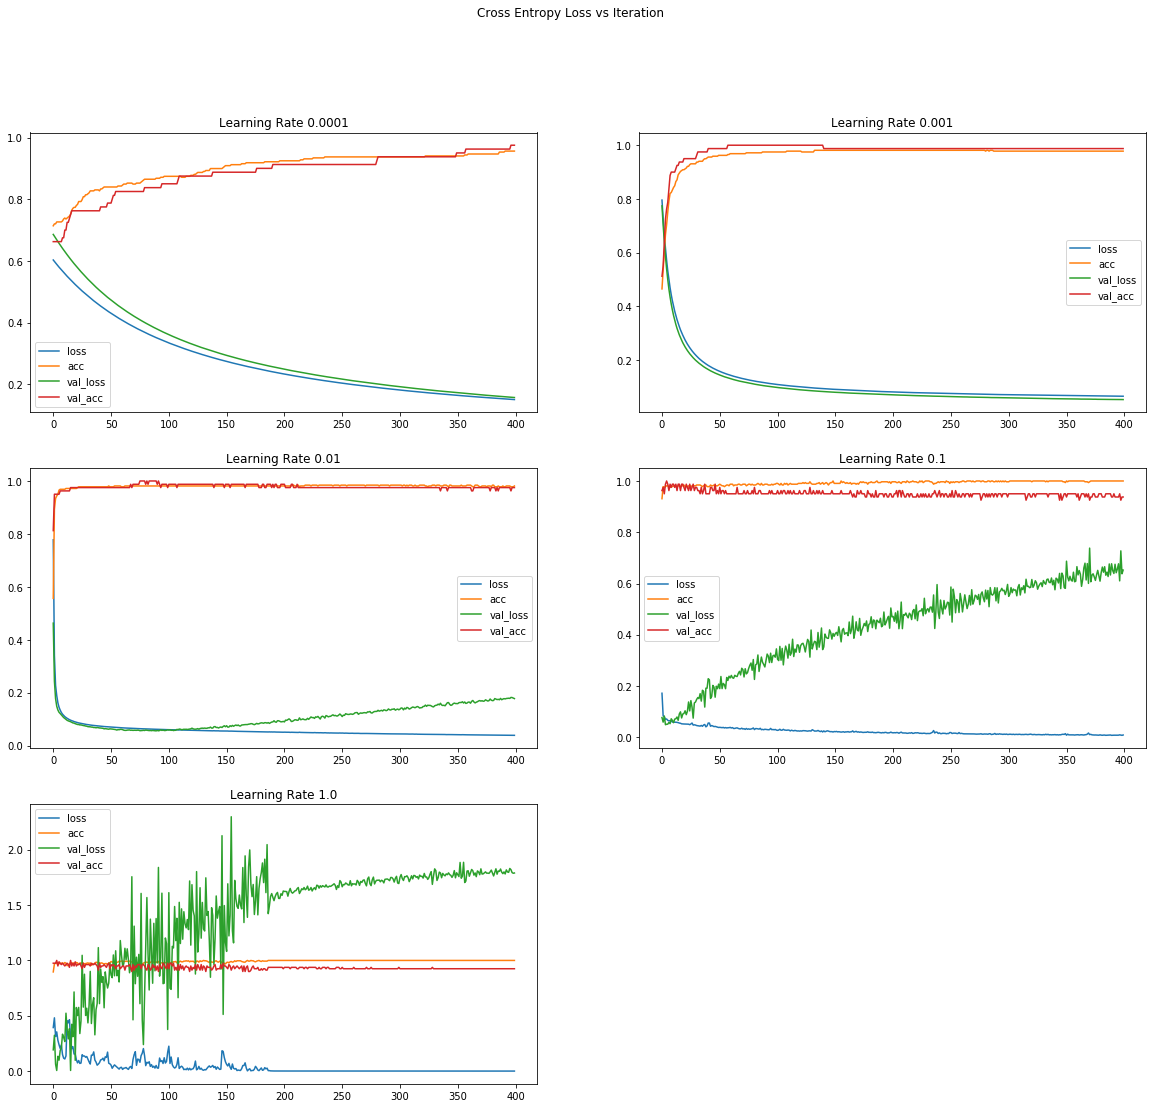

In [14]:
loss_hists = []
learning_rates = [.0001*10**k for k in range(5)]
epochs = 400
val_size = .2
fit_model = lambda m, vs: m.fit(bc_xtrain.values, 
                                bc_ytrain.values, 
                                epochs = epochs, 
                                validation_split = vs, 
                                verbose = 0)
for  lr in learning_rates:
    model = compile_log_model(lr)
    hist = fit_model(model, val_size)
    loss_hists.append(hist.history)
    
plot_title = lambda x: 'Learning Rate ' + str(learning_rates[x])         
lineplot_small_multiples(loss_hists, 'Cross Entropy Loss vs Iteration', plot_title,2)

#### 2.6

In [15]:
results = []
for i in range(len(loss_hists)):
    result = {'learning_rate': learning_rates[i],
             'Best Validation Score': np.min(loss_hists[i]['val_loss']),
             'Best Validation Itteration': np.argmin(loss_hists[i]['val_loss']),
             'Best Training Score': np.min(loss_hists[i]['loss']),
             'Best Training Itteration': np.argmin(loss_hists[i]['loss'])}
    results.append(result)
results

[{'learning_rate': 0.0001,
  'Best Validation Score': 0.1573379158973694,
  'Best Validation Itteration': 399,
  'Best Training Score': 0.15065047660338804,
  'Best Training Itteration': 399},
 {'learning_rate': 0.001,
  'Best Validation Score': 0.05373199433088303,
  'Best Validation Itteration': 399,
  'Best Training Score': 0.06616863295576482,
  'Best Training Itteration': 399},
 {'learning_rate': 0.01,
  'Best Validation Score': 0.05623028576374054,
  'Best Validation Itteration': 89,
  'Best Training Score': 0.03934868911292943,
  'Best Training Itteration': 399},
 {'learning_rate': 0.1,
  'Best Validation Score': 0.04920808970928192,
  'Best Validation Itteration': 3,
  'Best Training Score': 0.00783745774343235,
  'Best Training Itteration': 389},
 {'learning_rate': 1.0,
  'Best Validation Score': 0.00590827998239547,
  'Best Validation Itteration': 3,
  'Best Training Score': 0.0004213292039873162,
  'Best Training Itteration': 398}]

So We get best results with ~400 itterations with a learning rate of .001.
Training loss is about half of what validation loss is there, so overtraining is an issue with too may steps.

#### 1.5

In [16]:
learning_rate = .001
model = compile_log_model(learning_rate)
#assume 400 work on 80% of the training data, so we'll use 89/.8 itterations to train on the whole set
model.fit(bc_xtrain.values, bc_ytrain.values, verbose = 0, epochs = int(400/.8)+1) 
model.evaluate(bc_xtest.values, bc_ytest.values)

171/171 [==============================] - 0s 345us/sample - loss: 0.0469 - acc: 0.9883


[0.0469233642811533, 0.9883041]